Tri is CCW: False
Tri is covered: False


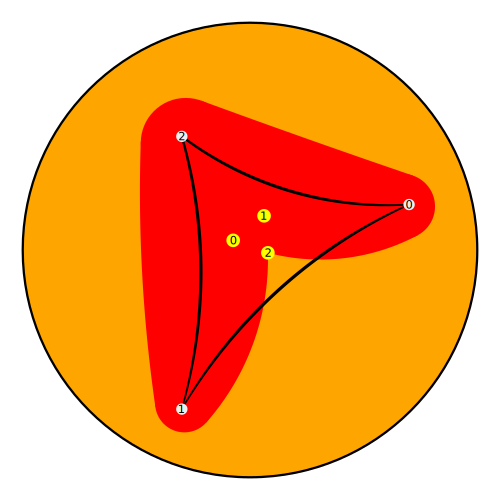

In [4]:
import drawSvg as draw
from constructions import deltaLines_of_Line, shift, isPointOnSegment
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import Triangle

delta=0.6

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))

p1=Point.fromEuclid(0.7,0.2)
p2=Point.fromEuclid(-0.3,-0.7)
p3=Point.fromEuclid(-0.3,0.5)
Points=[p1,p2,p3]
#Points=[Point.fromPolarEuclid(0.75,deg=i/3*360) for i in range(3)]
IdealPoints=[Ideal(Points[i].theta) for i in range(3)]
'''
C1= Circle.fromCenterRadius(p1,delta)
print(p1, C1.projShape.cx,C1.projShape.cy)
d.draw(C1, fill='blue')
'''

Tri=Triangle.fromVertices(Points)
#OffTri=Tri.offsetTriangle(delta)       #for ideal this doesn't work

deltaNeigbourhood(Tri, d, delta, 0)

for e in Tri.edges:
    d.draw(e, hwidth=0.03, fill='black')

for i,v in enumerate(Tri.vertices):
    #d.draw(makeMidCap(Tri, i, delta), fill='red')
    p = innerInterPoint(Tri,i,delta)
    d.draw(p, radius=0.03,fill='yellow')
    d.draw(draw.Text(str(i),0.05,*p, center=0.7))
    d.draw(v, radius=0.025, fill='#eee')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))




print('Tri is CCW:',Tri.isCCW())
print('Tri is covered:',Tri.isCovered(delta))
d

Ideal(-0.754, 0.657) True
Ideal(-0.905, -0.426) True
Ideal(-0.336, -0.942) True

Ideal(0.945, -0.327) True
Ideal(1.0, -0.011) True
Ideal(0.448, 0.894) True

Point(0.419, -0.711) False
Ideal(0.944, -0.33) True
Ideal(0.927, -0.376) True

Point(0.157, -0.283)
Ideal(0.584, -0.812)
Ideal(0.999, 0.034)

Point(0.821, -0.357)
Ideal(0.87, -0.492)
Ideal(0.828, -0.56)

Point(-0.141, 0.899)
Point(-0.293, 0.137)
Point(-0.719, 0.363)

Ideal(-0.912, -0.41)
Point(-0.202, 0.639)
Point(-0.783, -0.147)
Tri is CCW
Tri is covered
0.5999862747431166
0.8813735870195429


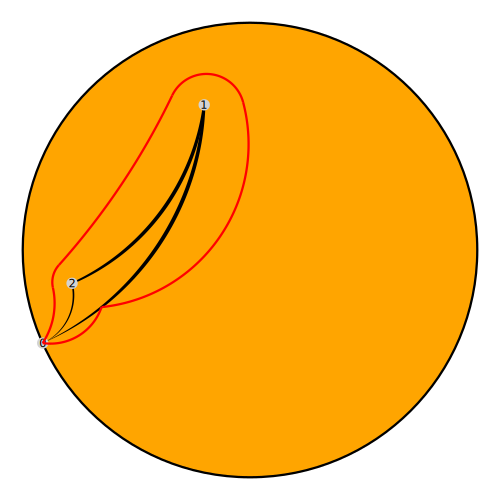

In [22]:
import math
import drawSvg as draw
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import *

d = draw.Drawing(2.2, 2.2, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, fill='orange',stroke_width=0.01, stroke='black'))



p1=Point.fromEuclid(-0.104, 0.069)
p2=Point.fromEuclid(-0.182, 0.212)
p3=Point.fromEuclid(-0.622, -0.316)


PList=[p1,p2, p3]
PList=randomPoints(3)




#PList=[Ideal.fromDegree(i/3*360) for i in range(2)]
PList=[Ideal(p.theta)if i<1 else p for i,p in enumerate(PList)]

#print(PList)

Tri=Triangle.fromVertices(PList)

#d.draw(Tri, stroke_width=0.003, stroke='blue')

delta = Tri.approx()
#delta=0.3


#d.draw(Tri, stroke='none', stroke_width=0.01, fill='white')
#d.draw(Tri.offsetPolygon(delta), fill='black')
#deltaNeigbourhood(Tri, d, delta, 0)
#d.draw(deltaNbh(Tri,delta,0), stroke='black', stroke_width=0.03, fill='red')


for i,l in enumerate(Tri.edges):
    #d.draw(Tri.midCap(i,delta),stroke_width=0.0015, stroke='black',fill='red')
    #d.draw(Tri.offsetEdge(i,delta, inner=True), hwidth=0.01, fill='darkorange')
    #d.draw(Tri.offsetEdge(i,delta, inner=False), hwidth=0.01, fill='blue')
    #d.draw(Hypercycle.fromHypercycleOffset(l,delta), hwidth=0.03,fill='yellow')
    d.draw(l, hwidth=0.04)

for i,v in enumerate(Tri.vertices):
    print(v)
    d.draw(v, radius=0.025, fill='lightgray')
    d.draw(draw.Text(str(i), 0.05, *v, center=0.7))

for l in deltaNbh(Tri,delta,0).edges:
    d.draw(l, stroke_width=0.01, stroke='red', fill='none')

#d.draw(Tri, fill='white')
#d.draw(deltaNbh(Tri,delta,0), stroke='none', fill='red')
'''
    d.draw(Tri.offsetVertice(i, i, delta, inner=False), radius=0.01, fill='lightblue')
    d.draw(Tri.offsetVertice(i, i-1, delta, inner=False), radius=0.01, fill='lightblue')
    d.draw(Tri.offsetVertice(i, i, delta, inner=True), radius=0.01, fill='orange')
    d.draw(Tri.offsetVertice(i, i-1, delta, inner=True), radius=0.01, fill='orange')
    d.draw(Tri.offsetVertice(i, i, delta, onEdge=True), radius=0.01, fill='lightgreen')
    d.draw(Tri.offsetVertice(i, i-1, delta, onEdge=True), radius=0.01, fill='lightgreen')

if Tri.isIdeal():
    print('Tri is Ideal')
else:
    print('Tri is not Ideal')
'''
if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isCovered(delta):
    print('Tri is covered')
else:
    print('Tri is not covered')

print(delta)
print(np.log(1+2**0.5))

d